考虑一个一维问题，其 Lagrangian 为:
$$\mathcal{L} = -\frac{1}{2}\left(\frac{d\phi}{dx}\right)^2 - \frac{\lambda}{4}\left(\phi^2 - \eta^2\right)^2.$$
现在我们尝试用梯度流算法。 首先将坐标压缩，$x \in (-\infty, \infty)$  $ \rightarrow x \in [-R, R]$. $\phi$ 的边界条件为它的真空期望值，
$$
\lim_{x \to \pm \infty} \phi(x) = \pm \eta.$$
梯度流算法指的是引入一个 fictitious time, 于是原问题中的场 $\phi_{k}$ 不再仅依赖于空间，同时依赖于时间，
$$\phi_{k}=\phi_{k}(\mathbf{x},t) .$$
因此， $\phi_{k}$ 的求解转化为求解能量的最低点。 为了实现这种最小化,  $\phi_{k}$ 的时间导数, i.e. $\dot{\phi}_{k}$, 需要等于能量对场 $\phi_{k}^{\dagger}$ 的泛函偏导，
$$
\dot{\phi}_{k}=-\frac{\delta E}{\delta \phi_{k}^{\dagger}} .$$
从 Euler-Lagrange 方程，
$$\dot{\phi}_{k}=\nabla^{2}\phi_{k}-\frac{dV}{d\phi_{k}^{\dagger}} .$$
接下来，需要对时空做离散化，
$$\dot{\phi} \longrightarrow \frac{\phi^{a+1}_b - \phi^a_b}{\Delta t},$$
$$
\frac{d^2\phi_k}{dx^2} \longrightarrow \frac{\phi^{a}_{b+1} - \phi^{a}_{b-1} + 2\phi^{a}_b}{(\Delta x)^2}.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

0.008000000000000002
Beginning Field Value Calculations:


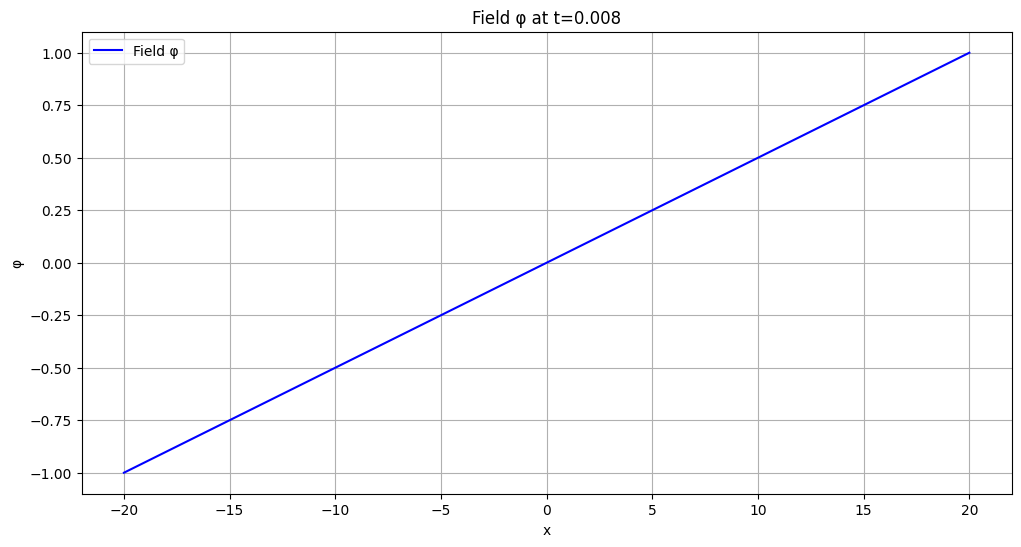

In [5]:
# Constants
L = 1  # Input value of λ
v = 1  # Input value of η, the VEV of φ
R = 20  # Defines R, the region of integration
N = 100  # Number of spatial points
deltaX = (2 * R) / N  # Spatial step length
r = 0.05
deltaT = r * (deltaX ** 2)  # Temporal step length
print(deltaT)
T = 1 # Number of time steps

# Initialize arrays
Phi = np.zeros((N + 1, T + 1))  # φ array
EnergyDensity = np.zeros((N + 1, T))  # Energy density array
Energy = np.zeros(T)  # Total energy array

# Truncated boundary conditions
for q in range(T + 1):
    Phi[0][q] = -v  # The LHS boundary condition
    Phi[N][q] = v   # The RHS boundary condition

# Initial shape of scalar field
for q in range(1, N):
    Phi[q][0] = v * ((deltaX * q) / R - 1)  # A simple straight line

print("Beginning Field Value Calculations:")

# Evolve φ
for n in range(T - 1):  # Iterate until T-1 to avoid index out of bounds
    for k in range(1, N):  # Calculate for k from 1 to N-1
        Phi[k][n + 1] = (Phi[k][n] 
                         + r * (Phi[k + 1][n] + Phi[k - 1][n] - 2 * Phi[k][n])
                         - deltaT * L * Phi[k][n] * (Phi[k][n] ** 2 - v ** 2))

    #print(f"{(n + 1) * 100 // (T - 1)}% completed", end="\r")

# Plotting results
x_values = -R + np.arange(N + 1) * deltaX

# Plot φ at the final time step
plt.figure(figsize=(12, 6))
plt.plot(x_values, Phi[:, T-1], label='Field φ', color='blue')
plt.title('Field φ at t=0.008')
plt.xlabel('x')
plt.ylabel('φ')
plt.grid()
plt.legend()
plt.show()


0.008000000000000002
Beginning Field Value Calculations:


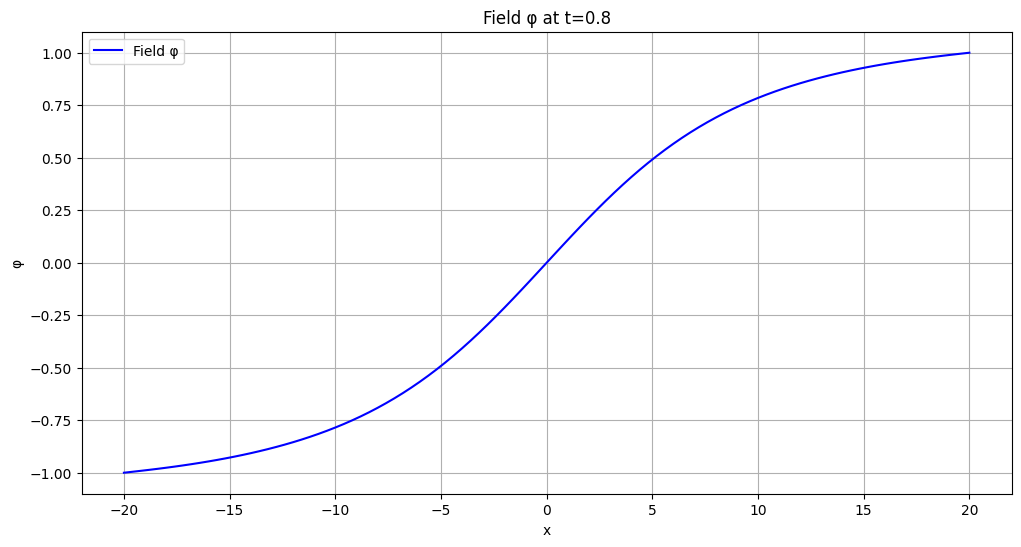

In [6]:
# Constants
L = 1  # Input value of λ
v = 1  # Input value of η, the VEV of φ
R = 20  # Defines R, the region of integration
N = 100  # Number of spatial points
deltaX = (2 * R) / N  # Spatial step length
r = 0.05
deltaT = r * (deltaX ** 2)  # Temporal step length
print(deltaT)
T = 100 # Number of time steps

# Initialize arrays
Phi = np.zeros((N + 1, T + 1))  # φ array
EnergyDensity = np.zeros((N + 1, T))  # Energy density array
Energy = np.zeros(T)  # Total energy array

# Truncated boundary conditions
for q in range(T + 1):
    Phi[0][q] = -v  # The LHS boundary condition
    Phi[N][q] = v   # The RHS boundary condition

# Initial shape of scalar field
for q in range(1, N):
    Phi[q][0] = v * ((deltaX * q) / R - 1)  # A simple straight line

print("Beginning Field Value Calculations:")

# Evolve φ
for n in range(T - 1):  # Iterate until T-1 to avoid index out of bounds
    for k in range(1, N):  # Calculate for k from 1 to N-1
        Phi[k][n + 1] = (Phi[k][n] 
                         + r * (Phi[k + 1][n] + Phi[k - 1][n] - 2 * Phi[k][n])
                         - deltaT * L * Phi[k][n] * (Phi[k][n] ** 2 - v ** 2))

    #print(f"{(n + 1) * 100 // (T - 1)}% completed", end="\r")

# Plotting results
x_values = -R + np.arange(N + 1) * deltaX

# Plot φ at the final time step
plt.figure(figsize=(12, 6))
plt.plot(x_values, Phi[:, T-1], label='Field φ', color='blue')
plt.title('Field φ at t=0.8')
plt.xlabel('x')
plt.ylabel('φ')
plt.grid()
plt.legend()
plt.show()


Beginning Field Value Calculations:


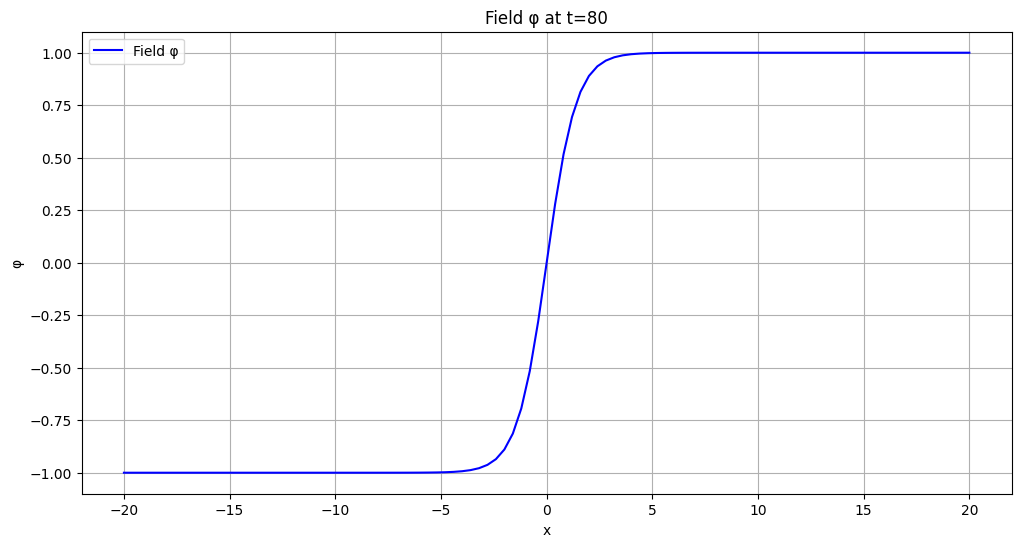

In [7]:
# Constants
L = 1  # Input value of λ
v = 1  # Input value of η, the VEV of φ
R = 20  # Defines R, the region of integration
N = 100  # Number of spatial points
deltaX = (2 * R) / N  # Spatial step length
r = 0.05
deltaT = r * (deltaX ** 2)  # Temporal step length
T = 10000 # Number of time steps

# Initialize arrays
Phi = np.zeros((N + 1, T + 1))  # φ array
EnergyDensity = np.zeros((N + 1, T))  # Energy density array
Energy = np.zeros(T)  # Total energy array

# Truncated boundary conditions
for q in range(T + 1):
    Phi[0][q] = -v  # The LHS boundary condition
    Phi[N][q] = v   # The RHS boundary condition

# Initial shape of scalar field
for q in range(1, N):
    Phi[q][0] = v * ((deltaX * q) / R - 1)  # A simple straight line

print("Beginning Field Value Calculations:")

# Evolve φ
for n in range(T - 1):  # Iterate until T-1 to avoid index out of bounds
    for k in range(1, N):  # Calculate for k from 1 to N-1
        Phi[k][n + 1] = (Phi[k][n] 
                         + r * (Phi[k + 1][n] + Phi[k - 1][n] - 2 * Phi[k][n])
                         - deltaT * L * Phi[k][n] * (Phi[k][n] ** 2 - v ** 2))

    #print(f"{(n + 1) * 100 // (T - 1)}% completed", end="\r")

# Plotting results
x_values = -R + np.arange(N + 1) * deltaX

# Plot φ at the final time step
plt.figure(figsize=(12, 6))
plt.plot(x_values, Phi[:, T-1], label='Field φ', color='blue')
plt.title('Field φ at t=80')
plt.xlabel('x')
plt.ylabel('φ')
plt.grid()
plt.legend()
plt.show()


Energy Calculations Complete. Now Plotting Results.


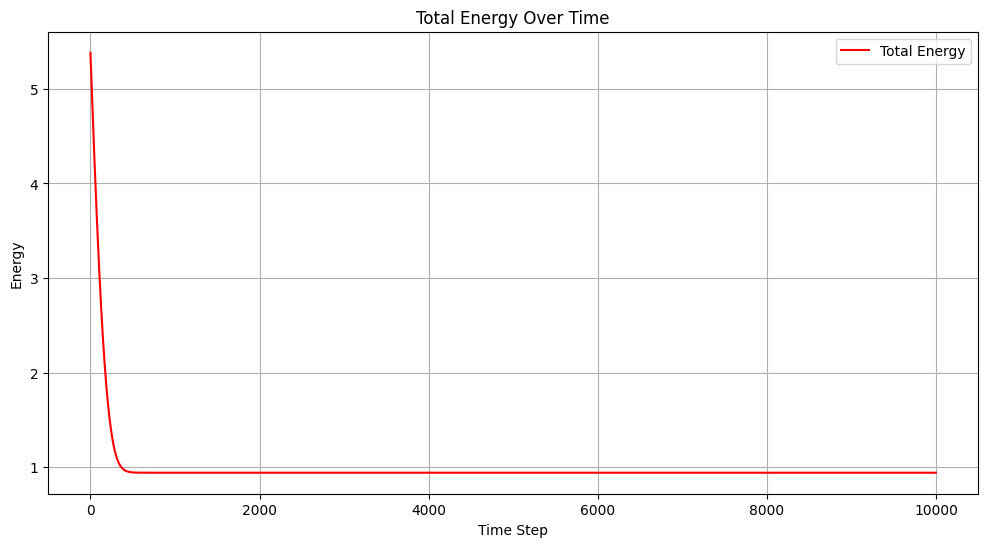

In [10]:
# Calculate energy density and total energy
for n in range(T):
    Energy[n] = 0  # Initialize Energy
    for k in range(N):  # Ensure we stay within bounds
        # Calculate energy density
        EnergyDensity[k][n] = (0.5 * ((Phi[k + 1][n] - Phi[k][n]) / deltaX) ** 2 +
                                       0.25 * L * (Phi[k][n] ** 2 - v ** 2) ** 2)
        Energy[n] += EnergyDensity[k][n] * deltaX  # Total energy calculation
    #print(f"{(n + 1) * 100 // T}% completed", end="\r")

print("Energy Calculations Complete. Now Plotting Results.")



# Plot Energy over time
plt.figure(figsize=(12, 6))
plt.plot(np.arange(T), Energy, label='Total Energy', color='red')
plt.title('Total Energy Over Time')
plt.xlabel('Time Step')
plt.ylabel('Energy')
plt.grid()
plt.legend()
plt.show()


可以看出，随着时间进行，最终能量逐渐达到最低点，即解达到稳定。